In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [81]:
data = pd.read_csv('train.csv')

In [82]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#since we want to manipulate arrays lets convert everything into numpy arrays
data = np.array(data)

#set up some dev data to eliminate overfitting to actual data
m, n = data.shape
np.random.shuffle(data) #shuffle before splitting into dev and training set


data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.


data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [84]:
Y_train

array([0, 5, 7, ..., 2, 9, 3], dtype=int64)

In [85]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

In [92]:
def ReLU(z):
    return np.maximum(z, 0) #if each element in z is greater than z return that, if 0 then return 0

def softmax(z):
    var = np.exp(z) / sum(np.exp(z))
    return var
    

def forward_prop(w1, b1, w2, b2, X):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2
    
def deriv_relu(z):
    return z > 0 #when booleans are converted to num, true = 1 and false = 0]
# so if 1 elemetn in z is more than 0 return one otherwise 0

def one_hot(Y): #one hot encode Y
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1 #array from range 0 to m, labels set to 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(z1, a1, z2, a2, w1, w2, X, Y):
    one_hot_Y = one_hot(Y)
    dz2 = a2 - one_hot_Y
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * deriv_relu(z1)
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz2)
    return dw1, db1, dw2, db2

In [93]:
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, a):
    w1 = w1 - a*dw1
    b1 = b1 - a*db1
    w2 = w2 - a*dw2
    b2 = b2 - a*db2
    return w1, b1, w2, b2

In [94]:
def get_pred(a2):
    return np.argmax(a2, 0)

def get_acc(pred, Y):
    print(pred, Y)
    return np.sum(pred == Y) / Y.size

def grad_descent(X, Y, a, iterations):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w1, w2, X, Y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, a)
        if i % 10 == 0:
            print("Iteration: ", i)
            pred = get_pred(a2)
            print(get_acc(pred, Y))
    return w1, b1, w2, b2

In [103]:
w1, b1, w2, b2 = grad_descent(X_train, Y_train, 0.10, 5000)

Iteration:  0
[6 6 7 ... 3 6 6] [0 5 7 ... 2 9 3]
0.09417073170731707
Iteration:  10
[6 6 7 ... 3 4 1] [0 5 7 ... 2 9 3]
0.1815609756097561
Iteration:  20
[6 6 7 ... 0 4 1] [0 5 7 ... 2 9 3]
0.27831707317073173
Iteration:  30
[6 1 7 ... 0 9 6] [0 5 7 ... 2 9 3]
0.37758536585365854
Iteration:  40
[6 6 7 ... 0 9 6] [0 5 7 ... 2 9 3]
0.42846341463414633
Iteration:  50
[6 6 7 ... 0 9 6] [0 5 7 ... 2 9 3]
0.4666585365853659
Iteration:  60
[6 6 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.504780487804878
Iteration:  70
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.5397804878048781
Iteration:  80
[6 8 7 ... 5 9 3] [0 5 7 ... 2 9 3]
0.5730975609756097
Iteration:  90
[6 8 7 ... 5 4 3] [0 5 7 ... 2 9 3]
0.6010731707317073
Iteration:  100
[6 8 7 ... 5 4 3] [0 5 7 ... 2 9 3]
0.6250731707317073
Iteration:  110
[6 8 7 ... 5 4 3] [0 5 7 ... 2 9 3]
0.6472926829268293
Iteration:  120
[6 8 7 ... 5 9 3] [0 5 7 ... 2 9 3]
0.6665121951219513
Iteration:  130
[6 8 7 ... 3 9 3] [0 5 7 ... 2 9 3]
0.6836829268292683
Iteration:  14

Iteration:  1160
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.8905853658536586
Iteration:  1170
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.8908048780487805
Iteration:  1180
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.8910731707317073
Iteration:  1190
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.8913170731707317
Iteration:  1200
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.8915365853658537
Iteration:  1210
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.8917804878048781
Iteration:  1220
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.892
Iteration:  1230
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.8923414634146342
Iteration:  1240
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.8927073170731707
Iteration:  1250
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.8928536585365854
Iteration:  1260
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.8931463414634147
Iteration:  1270
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.8933414634146342
Iteration:  1280
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.8937073170731707
Iteration:  1290
[6 8 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.8938780487804878
Itera

Iteration:  2310
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9096585365853659
Iteration:  2320
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9096829268292683
Iteration:  2330
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9096829268292683
Iteration:  2340
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9097317073170732
Iteration:  2350
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9099024390243903
Iteration:  2360
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9100975609756098
Iteration:  2370
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9103170731707317
Iteration:  2380
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9102682926829269
Iteration:  2390
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9103658536585366
Iteration:  2400
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9103658536585366
Iteration:  2410
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9103902439024391
Iteration:  2420
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9107073170731708
Iteration:  2430
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9108048780487805
Iteration:  2440
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.910804878

Iteration:  3460
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9176585365853659
Iteration:  3470
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9177317073170732
Iteration:  3480
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9177560975609756
Iteration:  3490
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9178536585365854
Iteration:  3500
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9178536585365854
Iteration:  3510
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9179024390243903
Iteration:  3520
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9180243902439025
Iteration:  3530
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9181463414634147
Iteration:  3540
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.918219512195122
Iteration:  3550
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9183170731707317
Iteration:  3560
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9183902439024391
Iteration:  3570
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9184390243902439
Iteration:  3580
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9185121951219513
Iteration:  3590
[6 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9186341463

Iteration:  4600
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.923
Iteration:  4610
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9230243902439025
Iteration:  4620
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9231219512195122
Iteration:  4630
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9231951219512196
Iteration:  4640
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9231951219512196
Iteration:  4650
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9232926829268293
Iteration:  4660
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9232439024390244
Iteration:  4670
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9232926829268293
Iteration:  4680
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9233414634146342
Iteration:  4690
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9234146341463415
Iteration:  4700
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9234146341463415
Iteration:  4710
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9234146341463415
Iteration:  4720
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9234878048780488
Iteration:  4730
[0 5 7 ... 2 9 3] [0 5 7 ... 2 9 3]
0.9234878048780488
Itera

In [108]:
def make_pred(X, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, X)
    pred = get_pred(a2)
    return pred
def test_pred(index, w1, b1, w2, b2):
    curr_img = X_train[:, index, None]
    pred = make_pred(X_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print("Prediction: ", pred)
    print("Label: ", label)
    
    curr_img = curr_img.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(curr_img, interpolation='nearest')
    plt.show()
    
    
dev_pred = make_pred(X_dev, w1, b1, w2, b2)
get_acc(dev_pred, Y_dev)

[2 8 2 8 0 3 7 1 3 7 9 9 0 4 9 1 6 1 6 8 7 5 7 4 3 8 1 3 6 0 4 5 0 4 6 4 9
 6 4 1 6 4 9 7 1 7 2 3 4 4 9 8 0 5 3 9 0 2 0 2 2 6 3 1 3 1 9 9 3 0 4 5 6 8
 4 5 9 8 5 5 1 9 1 5 8 4 5 2 9 5 5 7 4 2 3 8 3 0 2 0 6 2 0 0 9 5 0 1 8 4 5
 8 2 0 7 0 0 6 7 0 9 3 3 8 3 7 0 3 3 0 8 7 0 1 1 7 4 6 6 1 6 0 9 7 1 4 0 7
 2 0 3 4 0 5 5 7 3 2 3 0 2 5 2 8 4 8 5 1 1 7 3 2 3 9 0 4 6 5 4 2 4 7 6 6 3
 0 5 3 6 3 4 0 0 4 1 9 3 5 3 1 3 4 6 3 0 7 5 2 6 0 1 8 5 9 1 9 5 4 7 0 9 6
 6 9 6 8 2 4 9 2 3 1 9 8 3 1 4 5 2 2 3 7 7 1 9 0 2 1 8 6 4 0 5 7 3 9 9 7 1
 8 4 8 5 0 5 5 2 3 0 2 2 0 2 5 3 3 4 0 2 4 0 5 9 0 2 0 6 8 9 1 5 9 7 9 3 4
 5 3 1 3 1 8 0 1 4 4 1 9 0 4 2 1 4 4 9 4 8 5 8 6 5 2 8 4 8 5 3 1 5 4 4 3 4
 8 6 0 2 9 1 3 2 2 4 0 8 4 3 7 4 4 3 2 5 0 4 1 0 4 4 9 2 8 5 9 9 7 8 8 8 7
 1 6 8 5 7 9 2 3 8 2 3 4 6 1 3 7 9 9 5 4 4 7 5 3 9 4 8 4 4 8 0 0 8 4 8 2 0
 3 9 0 0 8 2 1 3 8 1 0 6 8 6 7 0 4 0 9 5 5 3 7 4 6 5 8 4 5 5 5 9 2 2 1 6 1
 7 7 4 4 4 3 0 1 0 3 3 4 2 1 9 9 4 0 5 7 0 4 1 3 0 7 4 5 6 4 3 5 6 7 2 5 6
 3 3 2 6 0 8 4 2 9 3 6 4 

0.931

Prediction:  [1]
Label:  1


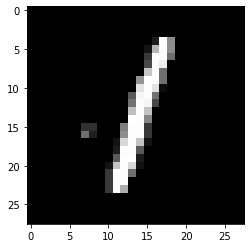

In [107]:
test_pred(728, w1, b1, w2, b2)